## **Exploración del precio histórico del cacao**
**Hecho por:** Pedro Sánchez - 202215902
### Importación de librerias y datos
Primero, es necesario importar las librerias que usaremos, así como importar los datos y revisar que sean los que necesitamos.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("DailyPrices_ICCO.csv")

### Revisar primeras y ultimas filas
Esta operación nos muestra una vista rápida del inicio y fin del DataFrame. Nos permite detectar rápidamente inconsistencias, valores extraños o errores en la importación.

In [3]:
df.head()   # primeras 5 filas

,Date,London futures (£ sterling/tonne),New York futures (US$/tonne),ICCO daily price (US$/tonne),ICCO daily price (Euro/tonne)
0,15/08/2025,"5,538.00","8,150.33","7,831.32","6,693.03"
1,14/08/2025,"5,545.33","8,189.67","7,848.47","6,741.05"
2,13/08/2025,"5,735.67","8,467.67","8,129.07","6,940.19"
3,12/08/2025,"5,786.67","8,505.33","8,163.01","6,993.66"
4,11/08/2025,"5,701.67","8,369.33","8,013.19","6,902.97"


In [4]:
df.tail()   # últimas 5 filas

,Date,London futures (£ sterling/tonne),New York futures (US$/tonne),ICCO daily price (US$/tonne),ICCO daily price (Euro/tonne)
7954,NaN,NaN,NaN,NaN,NaN
7955,NaN,NaN,NaN,NaN,NaN
7956,NaN,NaN,NaN,NaN,NaN
7957,NaN,NaN,NaN,NaN,NaN
7958,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.dropna(subset=['Date']).reset_index(drop=True)
df.tail()   # Verificamos que las filas con valores nulos se han eliminado

,Date,London futures (£ sterling/tonne),New York futures (US$/tonne),ICCO daily price (US$/tonne),ICCO daily price (Euro/tonne)
7924,07/10/1994,961.33,"1,307.67","1,416.46","1,416.00"
7925,06/10/1994,971.83,"1,322.33","1,430.32","1,430.00"
7926,05/10/1994,969.83,"1,326.00","1,430.57","1,431.00"
7927,04/10/1994,995.50,"1,358.33","1,462.28","1,462.00"
7928,03/10/1994,997.83,"1,363.33","1,466.24","1,466.00"


### Eliminar columnas irrelevantes
Esta operación elimina columnas que no aporta valor al análisis, esto con el fin de reducir el ruido y mejorar la eficiencia del procesamiento de los datos.

In [6]:
df = df.drop(columns=['London futures (£ sterling/tonne)',  'New York futures (US$/tonne)', 'ICCO daily price (Euro/tonne)'])
df.head()   # Verificamos que la columna se ha eliminado

,Date,ICCO daily price (US$/tonne)
0,15/08/2025,"7,831.32"
1,14/08/2025,"7,848.47"
2,13/08/2025,"8,129.07"
3,12/08/2025,"8,163.01"
4,11/08/2025,"8,013.19"


### Cambio de tipo de datos
Dado que los datos están en formato de texto, esta operación convierte la columna al tipo de dato necesario, garantizando que los calculos y operaciones se hagan correctamente.

In [7]:
df['ICCO daily price (US$/tonne)'] = df['ICCO daily price (US$/tonne)'].str.replace(',', '', regex=False).astype(float)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.head()   # Verificamos el cambio de tipo de dato

,Date,ICCO daily price (US$/tonne)
0,2025-08-15,7831.32
1,2025-08-14,7848.47
2,2025-08-13,8129.07
3,2025-08-12,8163.01
4,2025-08-11,8013.19


### Renombrar columnas
Esta operación cambia el nombre de la columna que le indiquemos. Esto nos ayuda para establecer nombre claros, consistentes y sin espacios (para facilitar el manejo y evitar errores en el código) cuando sea necesario.

In [8]:
df.rename(columns={'Date': 'Fecha'}, inplace=True)
df.rename(columns={'ICCO daily price (US$/tonne)': 'USD/tonelada'}, inplace=True)
df.head()   # Verificamos el cambio de nombre

,Fecha,USD/tonelada
0,2025-08-15,7831.32
1,2025-08-14,7848.47
2,2025-08-13,8129.07
3,2025-08-12,8163.01
4,2025-08-11,8013.19


### Revisar estadisticas descriptivas
Esta operación calcula métricas básicas (como media, desviación estándar, minimo, máximo, cuartiles) para las columnas que son numéricas. Esto nos ayuda a detectar outliers o valores fuera de rango y entender la distribución inicial de estos datos.

In [9]:
df.describe()

,Fecha,USD/tonelada
count,7929,7929.000000
mean,2010-03-13 13:58:40.998864896,2437.653678
min,1994-10-03 00:00:00,774.100000
25%,2002-06-28 00:00:00,1561.900000
50%,2010-03-16 00:00:00,2216.090000
75%,2017-11-28 00:00:00,2783.680000
max,2025-08-15 00:00:00,11984.660000
std,NaN,1504.633371


### Cambio de divisa USD -> COP
Esta operación nos permite generar nuevas columnas a partir de otras.

In [10]:
trm_df = pd.read_csv('TRM_historica.csv')
trm_df.head()  

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
0,4019.24,COP,16/08/2025,19/08/2025
1,4048.74,COP,15/08/2025,15/08/2025
2,4020.64,COP,14/08/2025,14/08/2025
3,4017.12,COP,13/08/2025,13/08/2025
4,4045.87,COP,12/08/2025,12/08/2025


In [11]:
trm_df["VIGENCIADESDE"] = pd.to_datetime(trm_df["VIGENCIADESDE"], dayfirst=True)
trm_df["VIGENCIAHASTA"] = pd.to_datetime(trm_df["VIGENCIAHASTA"], dayfirst=True)

# Crear una lista de todas las fechas intermedias entre esas dos
trm_df["FECHAS"] = trm_df.apply(
    lambda row: pd.date_range(row["VIGENCIADESDE"], row["VIGENCIAHASTA"]), axis=1
)

# Coger esa lista de fechas y separarlas en varias filas dentro del DataFrame
trm_expandido = trm_df.explode("FECHAS")

# Renombrar las columnas para mayor claridad
trm_expandido = trm_expandido[["FECHAS", "VALOR"]].rename(columns={"FECHAS": "Fecha", "VALOR": "TRM"})
trm_expandido = trm_expandido.reset_index(drop=True)

trm_expandido.head(10)

,Fecha,TRM
0,2025-08-16,4019.24
1,2025-08-17,4019.24
2,2025-08-18,4019.24
3,2025-08-19,4019.24
4,2025-08-15,4048.74
5,2025-08-14,4020.64
6,2025-08-13,4017.12
7,2025-08-12,4045.87
8,2025-08-09,4034.74
9,2025-08-10,4034.74


In [12]:
df = df.merge(trm_expandido[['Fecha', 'TRM']], on='Fecha', how='left')
df.head(10)   # Verificamos que la columna TRM se ha añadido

,Fecha,USD/tonelada,TRM
0,2025-08-15,7831.32,4048.74
1,2025-08-14,7848.47,4020.64
2,2025-08-13,8129.07,4017.12
3,2025-08-12,8163.01,4045.87
4,2025-08-11,8013.19,4034.74
5,2025-08-08,7652.69,4049.35
6,2025-08-07,7687.97,4049.35
7,2025-08-06,7553.05,4093.12
8,2025-08-05,7551.55,4097.38
9,2025-08-04,7324.64,4129.42


In [13]:
df["COP/kg"] = ((df["USD/tonelada"] * df["TRM"]) / 1000).round(2)
df.head()   # Verificamos que la nueva columna se ha creado correctamente

,Fecha,USD/tonelada,TRM,COP/kg
0,2025-08-15,7831.32,4048.74,31706.98
1,2025-08-14,7848.47,4020.64,31555.87
2,2025-08-13,8129.07,4017.12,32655.45
3,2025-08-12,8163.01,4045.87,33026.48
4,2025-08-11,8013.19,4034.74,32331.14


### Gráficos relevantes


In [14]:
import matplotlib.pyplot as plt

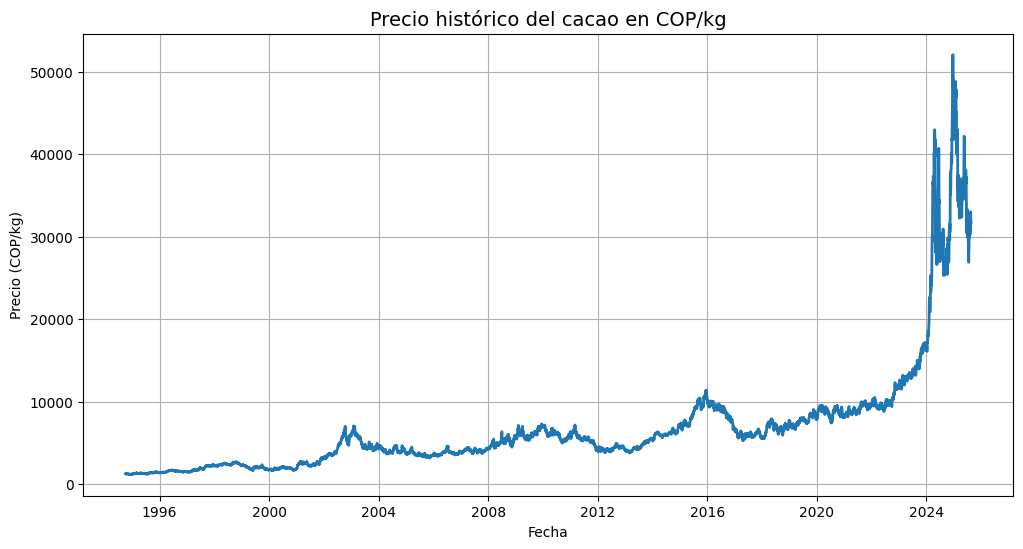

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df["Fecha"], df["COP/kg"], linewidth=2)

plt.title("Precio histórico del cacao en COP/kg", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Precio (COP/kg)")
plt.grid(True)

plt.show()

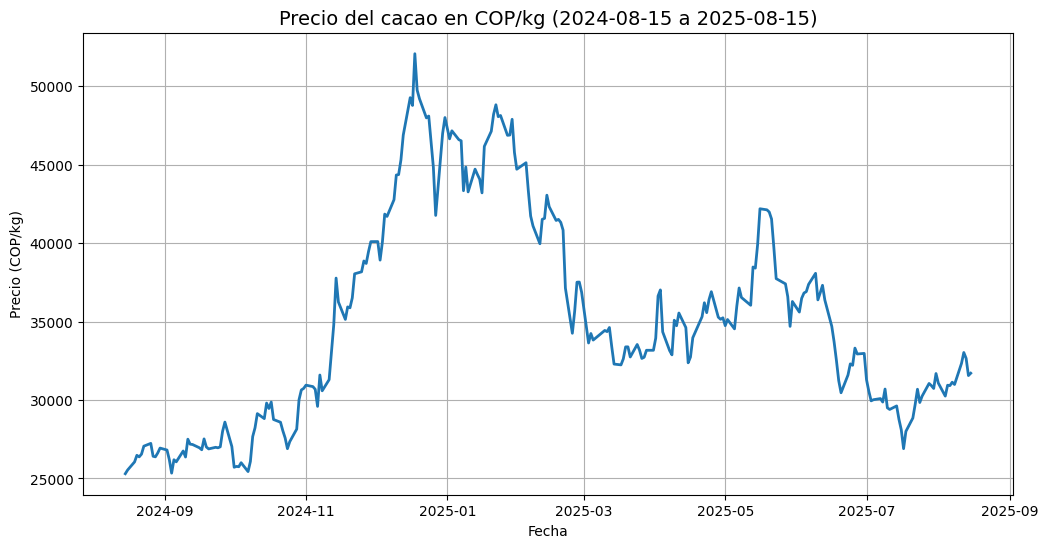

In [16]:
# También se puede definir un rango de fechas especifico
inicio = "2024-08-15"
fin = "2025-08-15"

df_rango = df[(df["Fecha"] >= inicio) & (df["Fecha"] <= fin)]

plt.figure(figsize=(12,6))
plt.plot(df_rango["Fecha"], df_rango["COP/kg"], linewidth=2)

plt.title(f"Precio del cacao en COP/kg ({inicio} a {fin})", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Precio (COP/kg)")
plt.grid(True)
plt.show()

### Descomposición de la serie
Revisión de tendencia, estacionalidad y residuo ("ruido").

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf

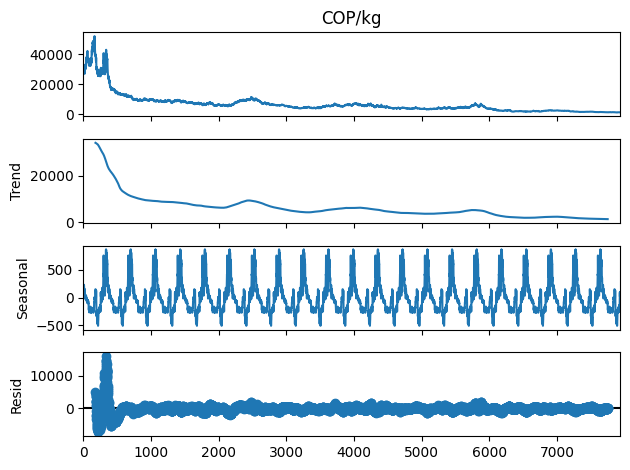

In [ ]:
result = seasonal_decompose(df['COP/kg'], model='additive', period=365)
result.plot()
plt.show()

### Test de estacionariedad

In [20]:
# Dickey-Fuller Aumentado
adf_test = adfuller(df['COP/kg'])
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])

# KPSS
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df['COP/kg'], regression='c')
print('KPSS Statistic:', kpss_test[0])
print('p-value:', kpss_test[1])

ADF Statistic: -3.8937112242417493
p-value: 0.0020816196017410487
KPSS Statistic: 6.773821963410961
p-value: 0.01


C:\Users\peter\AppData\Local\Temp\ipykernel_10912\48680327.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(df['COP/kg'], regression='c')


### Autocorrelación

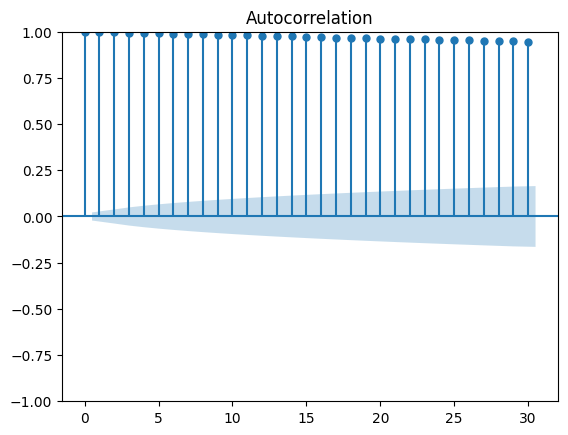

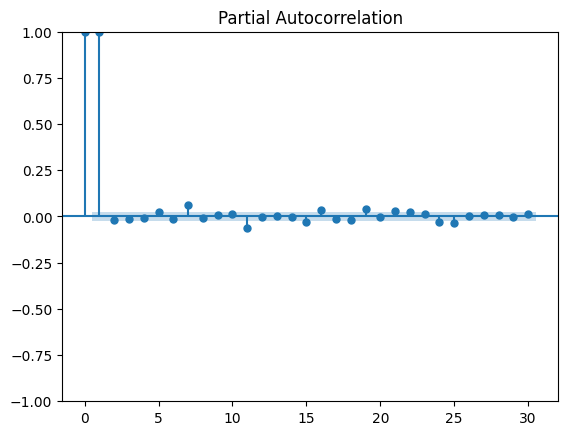

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['COP/kg'], lags=30)
plot_pacf(df['COP/kg'], lags=30)
plt.show()